## Ecuación De Calor O Difusión De Calor
Esta ecuación hace referencia a una ecuación diferencial parcial en una dimensión  ecuación 1 . En este caso se presenta una función de $T(x,t)$ lo cual va depender de la posición en una dimensión, que en este caso es la variable "x "y el tiempo "t" y va estar sujeta una constante positiva  que la denotaremos con el nombre de $\alpha$ que es la "Difusividad Térmica ".

\begin{equation}
{
\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{ \partial x^2}.....   (1)
\label{ec:1}
}
\end{equation}


En el siguiente código, veremos la solución númerica de esta ecuación diferencial parcial utilizando el método de " Diferencia Finitas". se aplico el concepto de diferencia finita centrada para la derivada de segundo orden y diferencia finita hacia adelante para la derivada de primer orden.Para resaltar este código se necesita de algunas condiciones que en este caso se denota como iniciales y contorno o frontera.

Ahora en este código se planteo un ejercicio con simetria lineal que nos referimo a una barra, que en este caso  su longitud es $L=2 metros $, pero este valor se puede modificar . Para relacionar nuestras condiciones de contorno  con  los extremos de la barra  y lo podemos expresar en la ecuación 2 y 3  , pero en nuestro código estos valores se pueden variar por el usuario.  
\begin{equation}
{
T(x=0)=20°c \rightarrow t >= 0....(2)
}
\end{equation}
\begin{equation}
{
 T(x=L)= 40°c \rightarrow t >= 0....(3)
 }
 \end{equation}
 
Luego agregamos para las condiciones inciales  lo veremos en la expresión 4
\begin{equation}
{
 Tinicial(t=0)= 0°c \rightarrow  0< x < L ..... (4)
 }
 \end{equation}
 Para terminar unos parametros que debemos tener en cuenta sera la estabilidad númerica  que se denota como nombre "sigma"  es un valor que tiene que ser igual o menor o igual que $0.5$, y este término no es un poco caótico, pero si lo hace cambiar dependiendo de la difusividad termica lo cual este depende del tipo del material, y una segunda dependencia serie el número de puntos(nx) de desea trabajar.

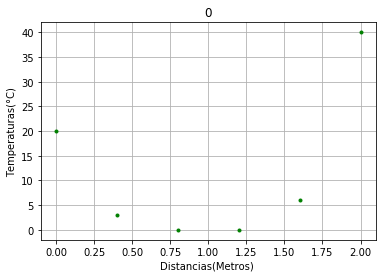

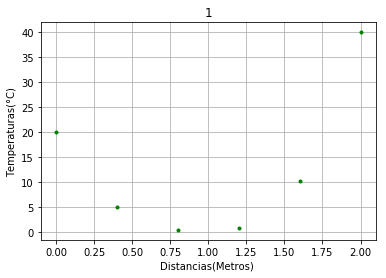

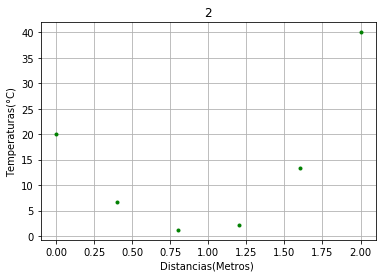

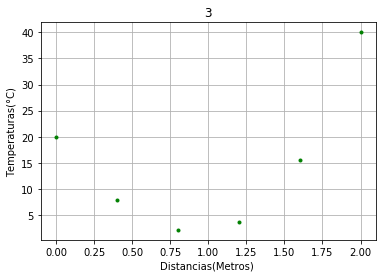

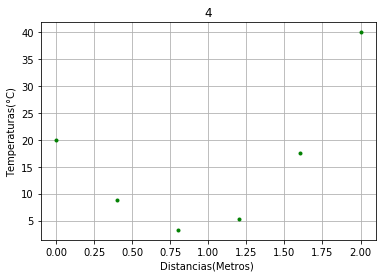

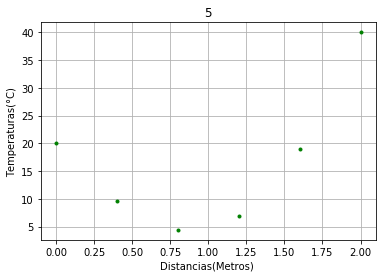

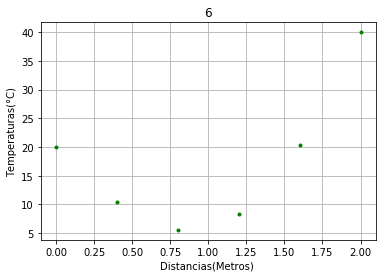

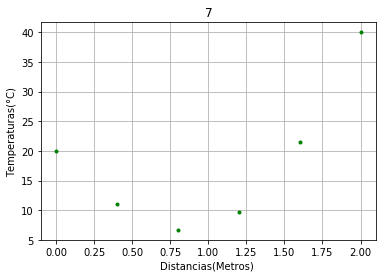

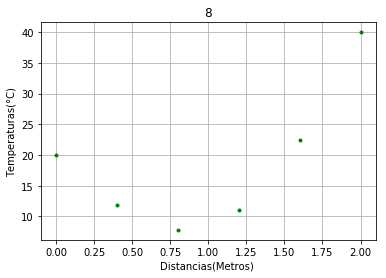

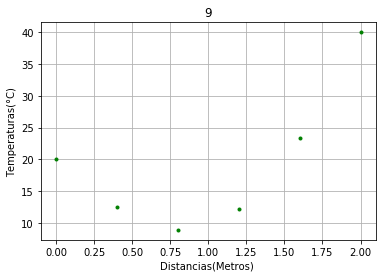

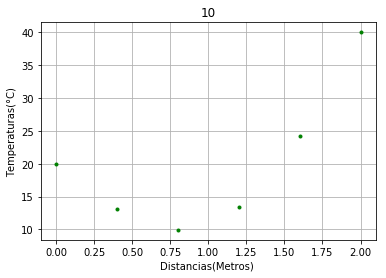

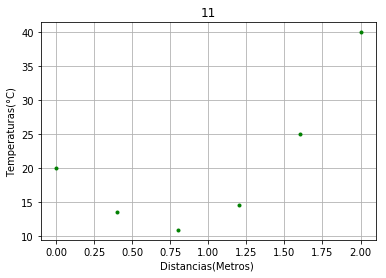

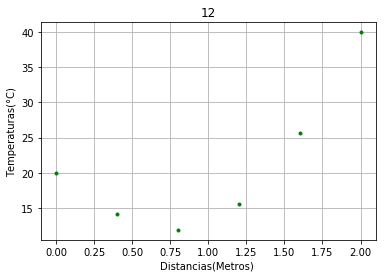

In [15]:

import numpy 
from pylab import *

nx=5 # número de puntos
longitud_barra=2 # la longitud de la barra en cm
alpha= 0.075 # unidades cm^2 /sg #coeficiente de difusión térmico
nt=13 # número de pasos en el tiempo 
dx=longitud_barra/(nx-1)
t_final=6 # tiempo final en el que se quiere ver el fenómeno
t=numpy.linspace(0,t_final,nt) # es un matriz para ver los puntos del tiempo hasta el tiempo final 
dt=t[1]-t[0]


# Aquí se calcula el valor  de la estabilidad 
sigma= alpha*dt/dx**2  # valor de la estabilidad númerica


T1=20 # condiciones de contorno lado izquiero
#T1=float(input(" ingrese el valor de la condicion de contorno"))
T2=40   # condiciones de contorno  lado derecho 
#T2=float(input(" ingrese el valor de la condicion de contorno"))
T_in=0
T=numpy.ones(nx+1) # función T ^n,_i
T_funp=numpy.ones(nx+1) # función  T^n+1,_i
x=numpy.linspace(0,longitud_barra, nx+1)

#Aquí se inicia asociado la condicion inicial con la funcion 
for i in range(1,nx):
    T[i]=0
T[0]=T1
T[nx]=T2 
# Se fomenta las condiciones de contorno:
T_funp[0]= T1 #c°
T_funp[nx]=T2
    
if sigma <= 0.5 :
# Aqui se hace el calculo de las derivadas      
    for l in range(0,nt): # for del tiempo 
        for i in range(1,nx): # for de la posición 
            T_funp[i]= T[i] + (sigma)*(T[i-1] - 2*T[i] + T[i+1])
   
    
    # la actualizacion de la función 
        T=T_funp.copy()
    
    # Graficando la temperatura vs la posición de cada paso
    
        plot(x,T_funp,'.g')
        xlabel('Distancias(Metros) ')
        ylabel('Temperaturas(°C)')
        grid('on')
        title( l)
        show()
        
else: 
    print("\nEl sigma en este caso no cumple la estabilidad númerica y no  garantiza la convergencia método\n")
    print("\n por lo tanto, varie  el valor de la constante alpha o de los valores de dt y dx")
  
   

    


               
                
            
                
                
        





## Explicación
En este trabajo podemos observar que en el parámetro sigma es el detonante a que el método se presente convergencia  y si cumple con  el estándares tiene un 50%  de que vaya bien, pero además depende de los valores de punto que se maneje tanto en el dx , dt y el coeficiente de difusion termica. Ahora enfoquemonos en la gráficas podemos observar  que en los extremos de esta barra, la temperatura se va mantener constante, pero para algunas distancias  aproximadas como a 0.75 y 1,75  se ven cambios en la temperatura que hacen que aumente y pero en el centro de la barra , se ve aumentando pero muy pequeño valores